In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data=pd.read_csv(r"C:\Users\user\Downloads\credit_risk_dataset.csv",skipinitialspace=True)

In [3]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
data.shape

(32581, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# checking for duplicates

In [6]:
data[data.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [7]:
data.drop_duplicates(inplace=True)# dropping the duplicates

# Checking for missing values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [9]:
#filling nan values in the person_emp_length
data.person_emp_length.mean()
data.person_emp_length.median()

4.7905103238288556

4.0

In [10]:
x=data.person_emp_length.median()
data.person_emp_length.fillna(x,inplace=True)

In [11]:
#filling nan values in the loan_int_rate column
data.loan_int_rate.mean()
data.loan_int_rate.median()

11.017265100098905

10.99

In [12]:
x=data.loan_int_rate.median()
data.loan_int_rate.fillna(x,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


# outliers

In [14]:
data.skew()

person_age                     2.580490
person_income                 32.958748
person_emp_length              2.668217
loan_amnt                      1.191944
loan_int_rate                  0.220183
loan_status                    1.361172
loan_percent_income            1.063811
cb_person_cred_hist_length     1.659369
dtype: float64

#### outliers detection for person_income column(log transformation looks best for the person_income column)

In [15]:
Q1,Q2,Q3=tuple(data.person_income.quantile(q=[0.25,0.50,0.75]))
print(Q1,Q2,Q3)

38542.0 55000.0 79218.0


In [16]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

40676.0 140232.0 -22472.0


### log transformation

In [17]:
Q1,Q2,Q3=(np.log(data.person_income).quantile(q = [0.25,0.5,0.75]))

In [18]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.7204551105397066 12.36064141309613 9.478820970937305


In [19]:
data[(np.log(data.person_income) > UL) | (np.log(data.person_income)< LL)].index.value_counts()
# In logtransformation there are less outlier detection  compared to cube root transformation

1        1
27846    1
27838    1
27839    1
27840    1
        ..
15944    1
15943    1
15942    1
15941    1
32551    1
Length: 571, dtype: int64

In [20]:
person_income_tran=np.log(data.person_income)

In [21]:
data["person_income_tran"]=np.log(data.person_income) # converting the person_income to logtransformation

### Cube root transformation

In [22]:
Q1, Q2,Q3= (((data.person_income)**(1/3)).quantile(q = [0.25,0.5,0.75]))

In [23]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

9.168995885925483 56.70132960142149 20.02534605771956


In [24]:
data[( ((data.person_income)**(1/3))> UL) | (((data.person_income)**(1/3))< LL)].index.value_counts()

15       1
27854    1
27846    1
27847    1
27848    1
        ..
17905    1
17906    1
17907    1
17910    1
32551    1
Length: 678, dtype: int64

#### outlier detection for the person age column

In [25]:
Q1,Q2,Q3=tuple(data.person_age.quantile(q=[0.25,0.50,0.75]))
print(Q1,Q2,Q3)

23.0 26.0 30.0


In [26]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

7.0 40.5 12.5


### logtransformation

In [27]:
Q1,Q2,Q3=(np.log(data.person_age.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

3.1354942159291497 3.258096538021482 3.4011973816621555


In [28]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.2657031657330058 3.7997521302616644 2.736939467329641


In [29]:
data[(np.log(data.person_age) > UL) | (np.log(data.person_age)< LL)].index.value_counts()

81       1
32332    1
32323    1
32324    1
32325    1
        ..
30862    1
30864    1
30884    1
30886    1
32580    1
Length: 759, dtype: int64

### cube root transformation

In [30]:
Q1,Q2,Q3=((data.person_age)**(1/3)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

2.8438669798515654 2.9624960684073702 3.1072325059538586


In [31]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.26336552610229313 3.502280795107298 2.4488186906981255


In [32]:
data[((data.person_age)**(1/3) > UL) | ((data.person_age)**(1/3)< LL)].index.value_counts()

81       1
31982    1
31933    1
31934    1
31935    1
        ..
30574    1
30580    1
30587    1
30592    1
32580    1
Length: 1063, dtype: int64

In [33]:
person_age_tran=np.log(data.person_age)

In [34]:
data["person_age_tran"]=np.log(data.person_age)## logtransformation less outlier detection than the cube root 

In [35]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_income_tran,person_age_tran
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,10.985293,3.091042
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,9.169518,3.044522
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,9.169518,3.218876
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,11.089805,3.135494
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10.904119,3.178054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,10.878047,4.043051
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,11.695247,3.988984
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,11.238489,4.174387
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,11.918391,4.025352


#### outlier detection for the person_emp_length 

### logtransformation

In [36]:
Q1,Q2,Q3=(np.log(data.person_emp_length.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

0.6931471805599453 1.3862943611198906 1.9459101490553132


In [37]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

1.252762968495368 3.8250546017983655 -1.1859972721831067


In [38]:
data[(np.log(data.person_emp_length) > UL) | (np.log(data.person_emp_length)< LL)].index.value_counts()

0        1
21094    1
20994    1
20996    1
20998    1
        ..
9736     1
9763     1
9766     1
9771     1
32575    1
Length: 4088, dtype: int64

### cube root transformation

In [39]:
Q1,Q2,Q3=((data.person_emp_length)**(1/3)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

1.2599210498948732 1.5874010519681994 1.912931182772389


In [40]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.6530101328775157 2.8924463820886626 0.28040585057859957


In [41]:
data[((data.person_emp_length)**(1/3) > UL) | ((data.person_emp_length)**(1/3)< LL)].index.value_counts()

0        1
20897    1
21161    1
21165    1
21169    1
        ..
9840     1
9841     1
9843     1
9857     1
32575    1
Length: 4120, dtype: int64

In [42]:
person_emp_tran=np.log(data.person_emp_length)

In [43]:
data["person_emp_tran"]=np.log(data.person_emp_length)#logtransformation shows the less outliers than the cube root transformation

#### outliers detection for loan_amount

### logtransformation

In [44]:
Q1,Q2,Q3=(np.log(data.loan_amnt.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

8.517193191416238 8.987196820661973 9.413281215972873


In [45]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.8960880245566347 10.757413252807826 7.173061154581286


In [46]:
data[(np.log(data.loan_amnt) > UL) | (np.log(data.loan_amnt)< LL)].index.value_counts()

1        1
18605    1
18763    1
18762    1
18760    1
        ..
1499     1
1498     1
1497     1
1496     1
32425    1
Length: 509, dtype: int64

### cuberoot transformation

In [47]:
Q1,Q2,Q3=((data.loan_amnt)**(1/3)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

17.09975946676697 19.999999999999996 23.05218146029223


In [48]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

5.95242199352526 31.98081445058012 8.17112647647908


In [49]:
data[((data.loan_amnt)**(1/3) > UL) | ((data.loan_amnt)**(1/3)< LL)].index.value_counts()

0        1
26932    1
26311    1
26444    1
26491    1
        ..
15792    1
15852    1
15866    1
15900    1
32578    1
Length: 203, dtype: int64

In [50]:
loan_amt_tran=((data.loan_amnt)**(1/3))

In [51]:
data["loan_amt_tran"]=((data.loan_amnt)**(1/3))
##cube root transformation show the less outliers than the logtransformation

#### outlier detection for the loan_status

### logtransformation

In [52]:
Q1,Q2,Q3=(np.log(data.loan_int_rate.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

2.138889000323256 2.39698576841553 2.5733752977756086


In [53]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.4344862974523527 3.2251047439541374 1.487159554144727


In [54]:
data[(np.log(data.loan_amnt) > UL) | (np.log(data.loan_amnt)< LL)].index.value_counts()

0        1
21727    1
21740    1
21739    1
21738    1
        ..
10801    1
10800    1
10799    1
10798    1
32580    1
Length: 32416, dtype: int64

### cube root transformation

In [55]:
Q1,Q2,Q3=((data.loan_int_rate)**(1/3)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

2.040026912370836 2.223305952883101 2.3579480392365464


In [56]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.3179211268657105 2.8348297295351124 1.5631452220722701


In [57]:
data[((data.loan_int_rate)**(1/3) > UL) | ((data.loan_int_rate)**(1/3)< LL)].index.value_counts()

29277    1
dtype: int64

In [58]:
loan_int_tran=(data.loan_int_rate)**(1/3)

In [59]:
data["loan_int_tran"]=(data.loan_int_rate)**(1/3) #cuberoot transformation has less outliers than the logtransformation

In [60]:
data.skew()

person_age                     2.580490
person_income                 32.958748
person_emp_length              2.668217
loan_amnt                      1.191944
loan_int_rate                  0.220183
loan_status                    1.361172
loan_percent_income            1.063811
cb_person_cred_hist_length     1.659369
person_income_tran             0.157712
person_age_tran                1.218644
person_emp_tran                     NaN
loan_amt_tran                  0.144158
loan_int_tran                 -0.180254
dtype: float64

#### outlier detection fot loan_percent_income

### log transformation

In [61]:
Q1,Q2,Q3=(np.log(data.loan_percent_income.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

-2.4079456086518722 -1.8971199848858813 -1.4696759700589417


In [62]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.9382696385929306 -0.06227151216954585 -3.815350066541268


In [63]:
data[(np.log(data.loan_percent_income) > UL) | (np.log(data.loan_percent_income)< LL)].index.value_counts()

81       1
22355    1
25688    1
25559    1
25356    1
        ..
13516    1
13505    1
13502    1
13450    1
32551    1
Length: 516, dtype: int64

### cube root transformation

In [64]:
Q1,Q2,Q3=((data.loan_percent_income)**(1/3)).quantile(q=[0.25,0.50,0.75])
print(Q1,Q2,Q3)

0.4481404746557165 0.5313292845913056 0.6126925675228417


In [65]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.16455209286712524 0.8595207068235295 0.20131233535502863


In [66]:
data[((data.loan_percent_income)**(1/3) > UL) | ((data.loan_percent_income)**(1/3)< LL)].index.value_counts()

460      1
493      1
17938    1
18082    1
18203    1
18204    1
18322    1
18672    1
18917    1
19657    1
23727    1
27877    1
27878    1
28724    1
30049    1
31916    1
31922    1
31924    1
32297    1
17834    1
15963    1
15950    1
1773     1
535      1
571      1
577      1
640      1
894      1
962      1
1348     1
2452     1
15921    1
2829     1
3535     1
5590     1
6758     1
10007    1
15044    1
15877    1
32546    1
dtype: int64

In [67]:
loan_percent_tran=(data.loan_percent_income)**(1/3)

In [68]:
data["loan_percent_tran"]=(data.loan_percent_income)**(1/3)

In [69]:
data.skew()

person_age                     2.580490
person_income                 32.958748
person_emp_length              2.668217
loan_amnt                      1.191944
loan_int_rate                  0.220183
loan_status                    1.361172
loan_percent_income            1.063811
cb_person_cred_hist_length     1.659369
person_income_tran             0.157712
person_age_tran                1.218644
person_emp_tran                     NaN
loan_amt_tran                  0.144158
loan_int_tran                 -0.180254
loan_percent_tran              0.003648
dtype: float64

#### outlier detection cred_hist_length

### log transformation

In [70]:
Q1,Q2,Q3=(np.log(data.cb_person_cred_hist_length.quantile(q=[0.25,0.50,0.75])))
print(Q1,Q2,Q3)

1.0986122886681098 1.3862943611198906 2.0794415416798357


In [71]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.980829253011726 3.5506854211974246 -0.37263159084947906


In [72]:
data[(np.log(data.cb_person_cred_hist_length) > UL) | (np.log(data.cb_person_cred_hist_length) < LL)].index.value_counts()

Series([], dtype: int64)

In [73]:
cred_hist_tran=np.log(data.cb_person_cred_hist_length)

In [74]:
data["cred_hist_tran"]=np.log(data.cb_person_cred_hist_length)

In [75]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_income_tran,person_age_tran,person_emp_tran,loan_amt_tran,loan_int_tran,loan_percent_tran,cred_hist_tran
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,10.985293,3.091042,4.812184,32.710663,2.520892,0.838721,1.098612
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,9.169518,3.044522,1.609438,10.000000,2.233375,0.464159,0.693147
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,9.169518,3.218876,0.000000,17.651742,2.343471,0.829134,1.098612
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,11.089805,3.135494,1.386294,32.710663,2.478753,0.809267,0.693147
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10.904119,3.178054,2.079442,32.710663,2.425537,0.819321,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,10.878047,4.043051,0.000000,17.967018,2.360942,0.479142,3.401197
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,11.695247,3.988984,1.386294,26.024139,1.956563,0.531329,2.944439
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,11.238489,4.174387,1.098612,32.710663,2.223306,0.771944,3.332205
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,11.918391,4.025352,1.609438,24.662121,2.255869,0.464159,3.258097


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
 12  person_income_tran          32416 non-null  float64
 13  person_age_tran             324

## Analysis

In [124]:
data.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_income_tran,person_age_tran,person_emp_tran,loan_amt_tran,loan_int_tran,loan_percent_tran,cred_hist_tran
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,10.985293,3.091042,4.812184,32.710663,2.520892,0.838721,1.098612
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,9.169518,3.044522,1.609438,10.000000,2.233375,0.464159,0.693147
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,9.169518,3.218876,0.000000,17.651742,2.343471,0.829134,1.098612
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,11.089805,3.135494,1.386294,32.710663,2.478753,0.809267,0.693147
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10.904119,3.178054,2.079442,32.710663,2.425537,0.819321,1.386294


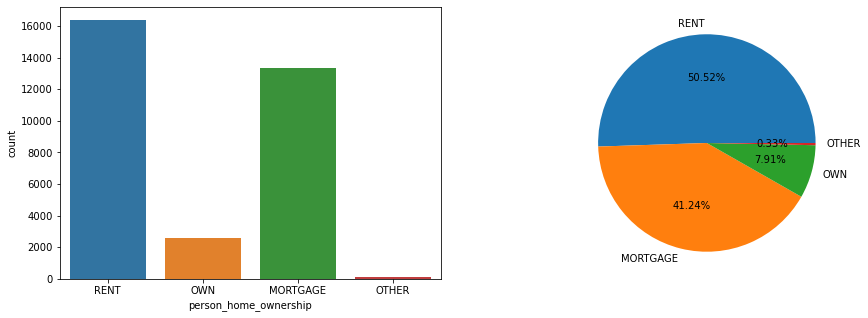

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=data.person_home_ownership)
plt.subplot(122)
plt.pie(data.person_home_ownership.value_counts().values,labels=data.person_home_ownership.value_counts().index,autopct='%.2f%%');

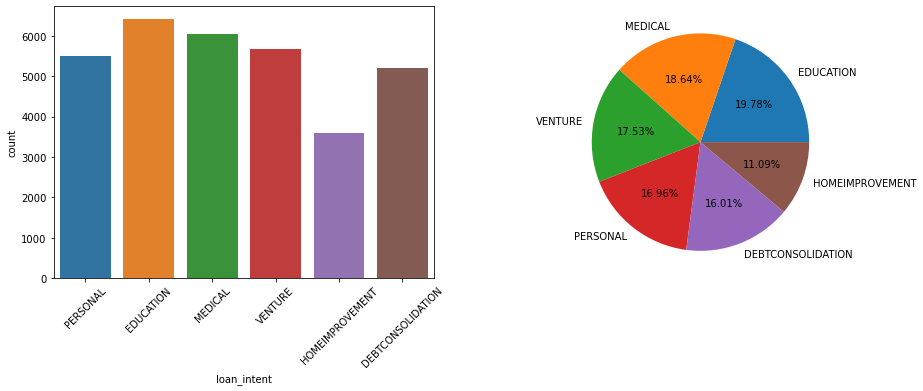

In [126]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=data.loan_intent)
plt.xticks(rotation=45)
plt.subplot(122)
plt.pie(data.loan_intent.value_counts().values,labels=data.loan_intent.value_counts().index,autopct='%.2f%%');

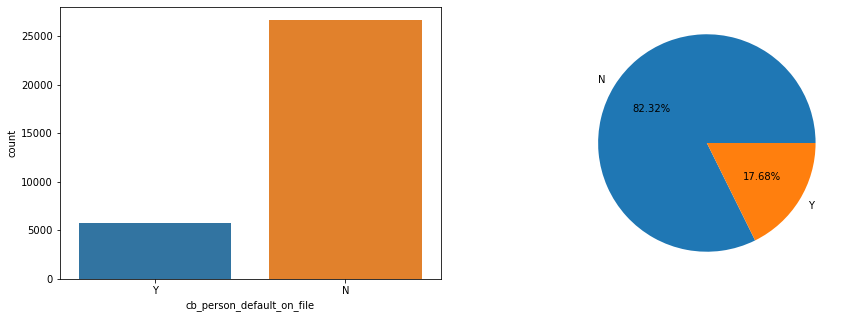

In [128]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=data.cb_person_default_on_file)
plt.subplot(122)
plt.pie(data.cb_person_default_on_file.value_counts().values,labels=data.cb_person_default_on_file.value_counts().index,autopct='%.2f%%');

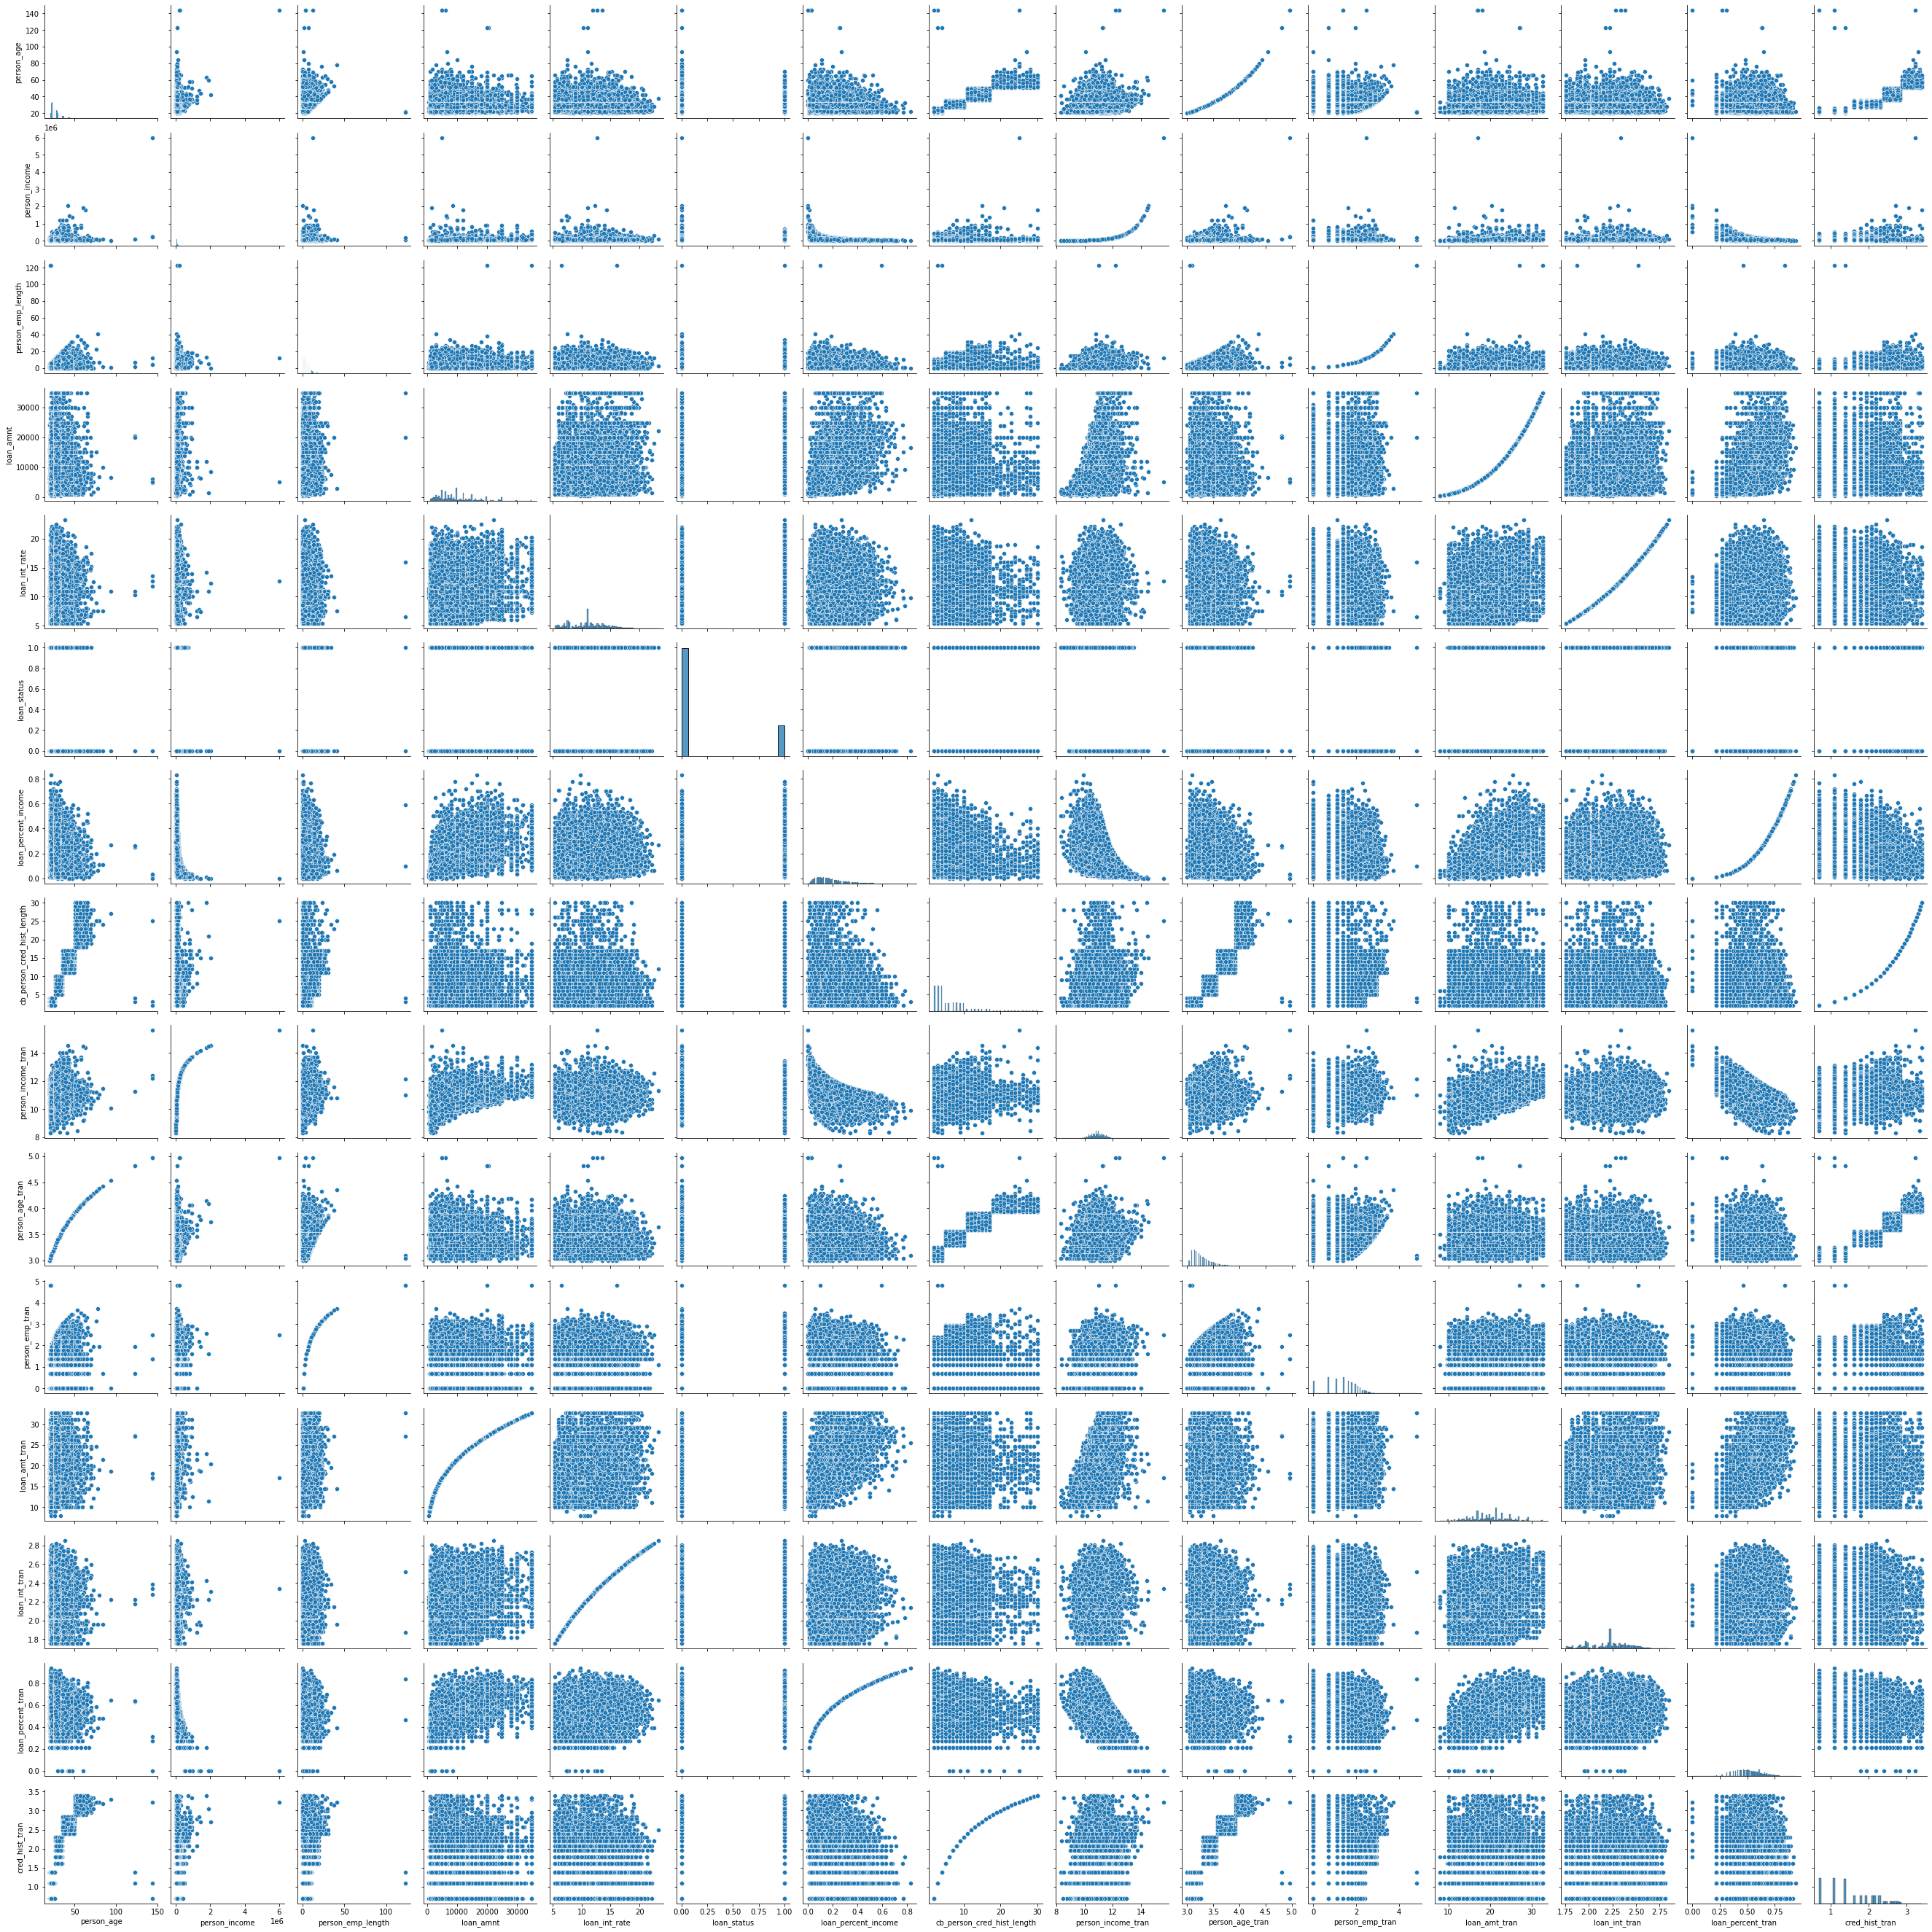

In [130]:
sns.pairplot(data);

## Data Preparation

### Identify the target variable and split the data into train & test

In [77]:
X=data[["person_age_tran","person_income_tran","person_home_ownership","loan_intent","loan_grade","person_emp_length","loan_int_tran","loan_amt_tran","loan_percent_tran","cb_person_default_on_file","cred_hist_tran"]]
y=data["loan_status"]

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2)

### TRAIN DATASET

In [79]:
X_train_num=X_train.select_dtypes(include=["int64","float64"])
X_train_cat=X_train.select_dtypes(include=["object"])

In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_ntran=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

In [81]:
X_train_ntran

,person_age_tran,person_income_tran,person_emp_length,loan_int_tran,loan_amt_tran,loan_percent_tran,cred_hist_tran
31795,1.559257,1.700691,-1.179613,0.392375,1.601253,-0.085583,1.825202
5368,-1.306115,-0.418948,0.053530,0.239856,0.035843,0.388837,-1.365748
12496,-0.424068,0.687542,-0.439727,-0.118607,0.963158,0.301285,-1.365748
3425,-0.424068,-1.081997,-0.193099,-0.242682,-0.685394,0.210428,-1.365748
31615,2.200489,1.273161,-0.193099,0.199479,1.424259,0.210428,1.825202
...,...,...,...,...,...,...,...
11798,-1.070772,0.480901,-1.179613,2.018455,0.283501,-0.085583,-1.365748
30439,1.694171,-0.022331,2.766443,-2.123217,-0.451825,-0.427562,1.715940
6637,-0.225652,-0.122025,1.286672,1.404521,-0.451825,-0.307333,-0.723624
2575,-1.070772,-0.962891,0.053530,1.595087,-1.269023,-0.691898,-0.723624


In [82]:
X_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
31795,MORTGAGE,DEBTCONSOLIDATION,B,N
5368,RENT,DEBTCONSOLIDATION,B,N
12496,MORTGAGE,HOMEIMPROVEMENT,B,N
3425,MORTGAGE,MEDICAL,B,N
31615,MORTGAGE,PERSONAL,B,N
...,...,...,...,...
11798,RENT,PERSONAL,D,Y
30439,MORTGAGE,PERSONAL,A,N
6637,RENT,HOMEIMPROVEMENT,E,N
2575,RENT,PERSONAL,E,N


### One Hot encoding(train data)

In [83]:
X_train_cat_one=pd.DataFrame(index=X_train_cat.index)
X_train_cat_one

""
31795
5368
12496
3425
31615
...
11798
30439
6637
2575


In [84]:
X_train_cat_one["person_home_ownership"]=data.person_home_ownership
X_train_cat_one["loan_intent"]=data.loan_intent
X_train_cat_one["cb_person_default_on_file"]=data.cb_person_default_on_file

In [85]:
X_train_cat_one

,person_home_ownership,loan_intent,cb_person_default_on_file
31795,MORTGAGE,DEBTCONSOLIDATION,N
5368,RENT,DEBTCONSOLIDATION,N
12496,MORTGAGE,HOMEIMPROVEMENT,N
3425,MORTGAGE,MEDICAL,N
31615,MORTGAGE,PERSONAL,N
...,...,...,...
11798,RENT,PERSONAL,Y
30439,MORTGAGE,PERSONAL,N
6637,RENT,HOMEIMPROVEMENT,N
2575,RENT,PERSONAL,N


In [86]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop="first", sparse=False)
X_train_cat_one_tran=pd.DataFrame(encoder.fit_transform(X_train_cat_one),columns=encoder.get_feature_names_out(X_train_cat_one.columns),
                                  index=X_train_cat.index)


In [87]:
X_train_cat_one_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
31795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5368,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3425,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
11798,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
30439,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6637,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2575,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### label encoding(test data)

In [88]:
X_train_cat_le=pd.DataFrame(index=X_train_cat.index)
X_train_cat_le

""
31795
5368
12496
3425
31615
...
11798
30439
6637
2575


In [89]:
map_dict={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
X_train_cat_le["loan_grade"]=data["loan_grade"].apply(lambda x: map_dict[x])

In [90]:
X_train_cat_le

,loan_grade
31795,2
5368,2
12496,2
3425,2
31615,2
...,...
11798,4
30439,1
6637,5
2575,5


In [91]:
X_train_cat_tran=pd.concat([X_train_cat_one_tran,X_train_cat_le],axis=1)
X_train_cat_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
31795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5368,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
12496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
3425,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
31615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
11798,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4
30439,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
6637,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5
2575,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5


In [92]:
X_train_tran=pd.concat([X_train_cat_tran,X_train_ntran],axis=1)
X_train_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade,person_age_tran,person_income_tran,person_emp_length,loan_int_tran,loan_amt_tran,loan_percent_tran,cred_hist_tran
31795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.559257,1.700691,-1.179613,0.392375,1.601253,-0.085583,1.825202
5368,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,-1.306115,-0.418948,0.053530,0.239856,0.035843,0.388837,-1.365748
12496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,-0.424068,0.687542,-0.439727,-0.118607,0.963158,0.301285,-1.365748
3425,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,-0.424068,-1.081997,-0.193099,-0.242682,-0.685394,0.210428,-1.365748
31615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2.200489,1.273161,-0.193099,0.199479,1.424259,0.210428,1.825202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11798,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4,-1.070772,0.480901,-1.179613,2.018455,0.283501,-0.085583,-1.365748
30439,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1.694171,-0.022331,2.766443,-2.123217,-0.451825,-0.427562,1.715940
6637,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5,-0.225652,-0.122025,1.286672,1.404521,-0.451825,-0.307333,-0.723624
2575,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5,-1.070772,-0.962891,0.053530,1.595087,-1.269023,-0.691898,-0.723624


### TEST DATASET

In [93]:
X_test_num=X_test.select_dtypes(include=["int64","float64"])
X_test_cat=X_test.select_dtypes(include=["object"])

In [94]:
X_test_ntran=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

In [95]:
X_test_ntran

,person_age_tran,person_income_tran,person_emp_length,loan_int_tran,loan_amt_tran,loan_percent_tran,cred_hist_tran
13885,-0.424068,0.763578,1.286672,1.772703,1.875000,1.065193,-1.365748
26223,1.131485,1.013047,3.259700,1.474525,-1.454407,-1.863593,1.183077
27743,-0.034725,2.085008,-0.686356,0.753149,-0.053158,-1.596951,0.618220
18809,0.149257,-1.286951,0.546787,0.082846,-1.494393,-0.691898,0.085358
337,-0.630585,1.551155,0.300158,-0.118607,1.961148,0.388837,-1.365748
...,...,...,...,...,...,...,...
7028,-1.070772,0.456384,-0.193099,-1.841810,-0.408292,-0.691898,-1.365748
3647,-1.070772,-0.679523,0.300158,-2.123217,0.035843,0.634328,-1.365748
31301,1.825580,0.772197,1.286672,-1.822745,0.035843,-0.555316,1.334018
13516,-0.845893,0.911283,0.053530,-1.012189,-1.666488,-2.198529,-0.268029


In [96]:
X_test_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
13885,MORTGAGE,DEBTCONSOLIDATION,E,Y
26223,MORTGAGE,DEBTCONSOLIDATION,C,N
27743,MORTGAGE,MEDICAL,C,Y
18809,OWN,PERSONAL,B,N
337,RENT,DEBTCONSOLIDATION,B,N
...,...,...,...,...
7028,RENT,PERSONAL,A,N
3647,MORTGAGE,DEBTCONSOLIDATION,A,N
31301,MORTGAGE,HOMEIMPROVEMENT,A,N
13516,MORTGAGE,DEBTCONSOLIDATION,A,N


### One hot encoding (test data)

In [97]:
X_test_cat_one=pd.DataFrame(index=X_test_cat.index)
X_test_cat_one

""
13885
26223
27743
18809
337
...
7028
3647
31301
13516


In [98]:
X_test_cat_one["person_home_ownership"]=data.person_home_ownership
X_test_cat_one["loan_intent"]=data.loan_intent
X_test_cat_one["cb_person_default_on_file"]=data.cb_person_default_on_file

In [99]:
X_test_cat_one

,person_home_ownership,loan_intent,cb_person_default_on_file
13885,MORTGAGE,DEBTCONSOLIDATION,Y
26223,MORTGAGE,DEBTCONSOLIDATION,N
27743,MORTGAGE,MEDICAL,Y
18809,OWN,PERSONAL,N
337,RENT,DEBTCONSOLIDATION,N
...,...,...,...
7028,RENT,PERSONAL,N
3647,MORTGAGE,DEBTCONSOLIDATION,N
31301,MORTGAGE,HOMEIMPROVEMENT,N
13516,MORTGAGE,DEBTCONSOLIDATION,N


In [100]:
X_test_cat_one_tran=pd.DataFrame(encoder.transform(X_test_cat_one),columns=encoder.get_feature_names_out(X_test_cat_one.columns),
                                  index=X_test_cat.index)


In [101]:
X_test_cat_one_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
13885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27743,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
18809,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
337,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31301,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Labelencoding (testdata)

In [102]:
X_test_cat_le=pd.DataFrame(index=X_test_cat.index)
X_test_cat_le

""
13885
26223
27743
18809
337
...
7028
3647
31301
13516


In [103]:
map_dict={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
X_test_cat_le["loan_grade"]=data["loan_grade"].apply(lambda x: map_dict[x])

In [104]:
X_test_cat_le

,loan_grade
13885,5
26223,3
27743,3
18809,2
337,2
...,...
7028,1
3647,1
31301,1
13516,1


In [105]:
X_test_cat_tran=pd.concat([X_test_cat_one_tran,X_test_cat_le],axis=1)
X_test_cat_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
13885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
26223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
27743,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
18809,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
337,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
7028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
31301,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
13516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [106]:
X_test_tran=pd.concat([X_test_cat_tran,X_test_ntran],axis=1)
X_test_tran

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade,person_age_tran,person_income_tran,person_emp_length,loan_int_tran,loan_amt_tran,loan_percent_tran,cred_hist_tran
13885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,-0.424068,0.763578,1.286672,1.772703,1.875000,1.065193,-1.365748
26223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.131485,1.013047,3.259700,1.474525,-1.454407,-1.863593,1.183077
27743,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,-0.034725,2.085008,-0.686356,0.753149,-0.053158,-1.596951,0.618220
18809,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.149257,-1.286951,0.546787,0.082846,-1.494393,-0.691898,0.085358
337,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,-0.630585,1.551155,0.300158,-0.118607,1.961148,0.388837,-1.365748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,-1.070772,0.456384,-0.193099,-1.841810,-0.408292,-0.691898,-1.365748
3647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.070772,-0.679523,0.300158,-2.123217,0.035843,0.634328,-1.365748
31301,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.825580,0.772197,1.286672,-1.822745,0.035843,-0.555316,1.334018
13516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.845893,0.911283,0.053530,-1.012189,-1.666488,-2.198529,-0.268029


## LogisticRegression

In [107]:
from sklearn.linear_model import LogisticRegression
linear=LogisticRegression()
linear.fit(X_train_tran,y_train)

LogisticRegression()

In [108]:
y_test_pred=linear.predict(X_test_tran)

In [109]:
from sklearn import metrics
linear_acc=metrics.accuracy_score(y_test,y_test_pred)
linear_acc

0.8451413881748072

### KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier
neighbour=KNeighborsClassifier()
neighbour.fit(X_train_tran,y_train)

KNeighborsClassifier()

In [111]:
#y_test_pred = neighbour.predict(X_test_tran)

In [112]:
neighbour_acc=metrics.accuracy_score(y_test,y_test_pred)
neighbour_acc

0.8451413881748072

### Decision tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train_tran,y_train)

DecisionTreeClassifier()

In [114]:
y_test_pred=tree.predict(X_test_tran)

In [115]:
tree_Acc=metrics.accuracy_score(y_test,y_test_pred)
tree_Acc

0.8905912596401028

### Random forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
ensemble=RandomForestClassifier()
ensemble.fit(X_train_tran,y_train)

RandomForestClassifier()

In [117]:
y_test_pred=ensemble.predict(X_test_tran)

In [118]:
ensemble_acc=metrics.accuracy_score(y_test,y_test_pred)
ensemble_acc

0.9304884318766067

### Support vector machine

In [119]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_tran,y_train)

SVC()

In [120]:
y_test_pred=svm.predict(X_test_tran)

In [121]:
svm_acc=metrics.accuracy_score(y_test,y_test_pred)
svm_acc

0.9036503856041131

In [122]:
data_df=pd.DataFrame({"Algorithms":["Logisticregression","KNN","Decisontree","Randomforest","Supportvectormachine"],
                     "Accuracy_score":[linear_acc,neighbour_acc,tree_Acc,ensemble_acc,svm_acc]})

In [123]:
data_df

,Algorithms,Accuracy_score
0,Logisticregression,0.845141
1,KNN,0.845141
2,Decisontree,0.890591
3,Randomforest,0.930488
4,Supportvectormachine,0.903650


<AxesSubplot:xlabel='Accuracy_score', ylabel='Algorithms'>

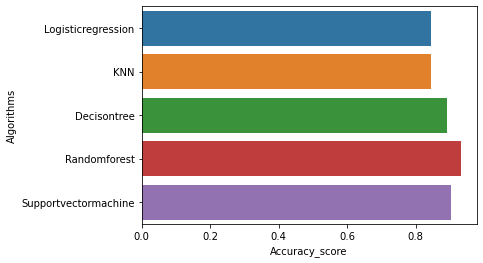

In [135]:
sns.barplot(y=data_df.Algorithms,x=data_df.Accuracy_score)

### Observation

- By observing all the algorithms `RandomForest Regression` is best model for loan Prediction.
- Because `RandomForest Regression` is giving more accuracy score 0.930488.